In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/amulya/Desktop/Biomedical-Text-Extraction-main/pubmed/Csv_files/final_pubmed_v3.csv")

In [2]:
df.head()

,Unnamed: 0,Title,Abstract,Journal,Language,Year,Month,Authors,Affiliations,Name,...,Impact_Factor,Impact_Factor_5Years,Journal_Category,Universities,Study_Type_Extracted,Standardized_University,Rank,Research_Score,Rank_Median,Research_Score_Category
0,0,prevalence and association of sleep duration a...,this study aimed to examine the prevalence of ...,bmc public health,eng,2024,Nov,"Zhou Zigui, Tian Xuewen","school of exercise and health, shanghai univer...",bmc public health,...,3.5,3.9,"PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH|Q1...","school of exercise and health, shanghai univer...",Unknown,shanghai university,501–600,38.0,550.5,Low (0-50)
1,1,the impact of pparγ and apoe gene polymorphism...,"globally, diabetic kidney disease (dkd) has be...",bmc nephrology,eng,2024,Nov,"Taurbekova Binura, Mukhtarova Kymbat, Salpynov...","department of biomedical sciences, school of m...",bmc nephrology,...,2.2,2.6,UROLOGY & NEPHROLOGY|Q2|54/126,"school of medicine, nazarbayev university, sch...",meta-analysis,nazarbayev university,501–600,29.5,550.5,Low (0-50)
2,2,immune checkpoint landscape of human atheroscl...,immune checkpoint inhibitor (ici) therapies ca...,nature cardiovascular research,eng,2024,Nov,"Barcia Durán José Gabriel, Das Dayasagar, Gild...","nyu cardiovascular research center, division o...",nature cardiovascular research,...,9.4,9.4,CARDIAC & CARDIOVASCULAR SYSTEMS|Q1|13/220,"nyu cardiovascular research center, department...",clinical development,york university,351–400,32.4,375.5,Low (0-50)
3,3,ezrin drives adaptation of monocytes to the in...,"ezrin, an actin-binding protein, orchestrates ...",cell death & disease,eng,2024,Nov,"Gudneppanavar Ravindra, Di Pietro Caterina, H ...","department of pediatrics, school of medicine, ...",cell death & disease,...,8.1,8.6,CELL BIOLOGY|Q1|33/205,"school of medicine, yale university, school of...",Unknown,yale university,10,94.9,10.0,High (75-100)
4,4,determining the quality of life and associated...,this study aimed to determine the quality of l...,journal of tissue viability,eng,2024,Nov,"Gül Şenay, Demir Ayşe Sılanur, Karadağ Ayişe, ...","faculty of nursing, hacettepe university, anka...",journal of tissue viability,...,2.4,2.9,NURSING|Q1|35/191,"hacettepe university, koc university, school o...",Unknown,hacettepe university,601–800,26.8,700.5,Low (0-50)


Profiling GMM Clusters
Cluster Profiles for GMM_Cluster:

             Impact_Factor_5Years  Research_Score
GMM_Cluster                                      
0                        3.358442       28.812121
1                        5.511864       63.382627
2                       21.829545       63.150000
Silhouette Score for GMM Clustering: 0.3877705258707141


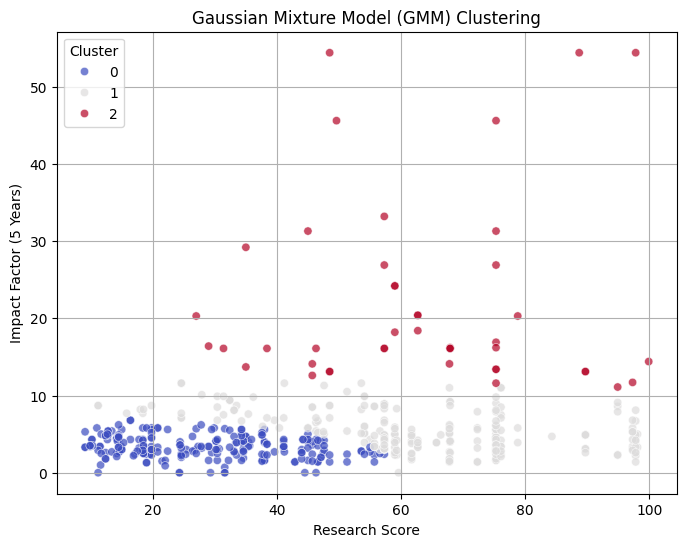

In [3]:
# Preprocessing: Select relevant numerical features and handle missing values
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# Define numerical features
numerical_features = ['Impact_Factor_5Years', 'Research_Score']  # Replace with your actual column names

data_subset = df[numerical_features].copy()
# data_subset = data_subset.fillna(data_subset.mean())  # Fill missing values with mean (or other strategy)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Step 2: Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
df['GMM_Cluster'] = gmm_labels

# Step 3: Profile the Clusters
def profile_clusters(data, cluster_col, features):
    cluster_profiles = data.groupby(cluster_col)[features].mean()
    print(f"Cluster Profiles for {cluster_col}:\n")
    print(cluster_profiles)
    return cluster_profiles

# Profile GMM Clusters
print("Profiling GMM Clusters")
gmm_profiles = profile_clusters(df, 'GMM_Cluster', numerical_features)

# Evaluate GMM Clustering
silhouette_gmm = silhouette_score(data_scaled, gmm_labels)
print(f"Silhouette Score for GMM Clustering: {silhouette_gmm}")

# Visualize GMM Clusters with actual features
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Research_Score'], 
    y=df['Impact_Factor_5Years'], 
    hue=gmm_labels, 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('Research Score')
plt.ylabel('Impact Factor (5 Years)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [4]:
# print the converged log-likelihood value
print(gmm.lower_bound_)
 
# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

-2.125774594213408
15


In [8]:
# Calculate total variance for each feature
total_variance = df[numerical_features].var()

# Calculate between-cluster variance
cluster_means = gmm_profiles.mean(axis=0)
between_cluster_variance = gmm_profiles.var()

# Calculate within-cluster variance
within_cluster_variance = total_variance - between_cluster_variance

# Calculate importance ratios
importance_ratios = between_cluster_variance / total_variance

# Normalize importance ratios to sum to 1
weights = importance_ratios / importance_ratios.sum()

print("Feature Weights Based on Cluster-Centric Variance Ratios:")
print(weights)

# Develop the scoring equation
impact_factor_weight = weights['Impact_Factor_5Years']
research_score_weight = weights['Research_Score']
#rank_median_weight = weights['Rank_Median']

print("\nScoring Equation:")
print(f"Score = {impact_factor_weight:.4f} * Impact_Factor_5Years + "
      f"{research_score_weight:.4f} * Research_Score")


Feature Weights Based on Cluster-Centric Variance Ratios:
Impact_Factor_5Years    0.784521
Research_Score          0.215479
dtype: float64

Scoring Equation:
Score = 0.7845 * Impact_Factor_5Years + 0.2155 * Research_Score


In [27]:
# Calculate the scoring equation
df['Score'] = (
    impact_factor_weight * df['Impact_Factor_5Years'] +
    research_score_weight * df['Research_Score'] 
    #rank_median_weight * df['Rank_Median']
)


In [9]:
df.head()

,Unnamed: 0,Title,Abstract,Journal,Language,Year,Month,Authors,Affiliations,Name,...,Journal_Category,Universities,Study_Type_Extracted,Standardized_University,Rank,Research_Score,Rank_Median,Research_Score_Category,GMM_Cluster,Score
0,0,prevalence and association of sleep duration a...,this study aimed to examine the prevalence of ...,bmc public health,eng,2024,Nov,"Zhou Zigui, Tian Xuewen","school of exercise and health, shanghai univer...",bmc public health,...,"PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH|Q1...","school of exercise and health, shanghai univer...",Unknown,shanghai university,501–600,38.0,550.5,Low (0-50),0,11.247839
1,1,the impact of pparγ and apoe gene polymorphism...,"globally, diabetic kidney disease (dkd) has be...",bmc nephrology,eng,2024,Nov,"Taurbekova Binura, Mukhtarova Kymbat, Salpynov...","department of biomedical sciences, school of m...",bmc nephrology,...,UROLOGY & NEPHROLOGY|Q2|54/126,"school of medicine, nazarbayev university, sch...",meta-analysis,nazarbayev university,501–600,29.5,550.5,Low (0-50),0,8.396389
2,2,immune checkpoint landscape of human atheroscl...,immune checkpoint inhibitor (ici) therapies ca...,nature cardiovascular research,eng,2024,Nov,"Barcia Durán José Gabriel, Das Dayasagar, Gild...","nyu cardiovascular research center, division o...",nature cardiovascular research,...,CARDIAC & CARDIOVASCULAR SYSTEMS|Q1|13/220,"nyu cardiovascular research center, department...",clinical development,york university,351–400,32.4,375.5,Low (0-50),1,14.356020
3,3,ezrin drives adaptation of monocytes to the in...,"ezrin, an actin-binding protein, orchestrates ...",cell death & disease,eng,2024,Nov,"Gudneppanavar Ravindra, Di Pietro Caterina, H ...","department of pediatrics, school of medicine, ...",cell death & disease,...,CELL BIOLOGY|Q1|33/205,"school of medicine, yale university, school of...",Unknown,yale university,10,94.9,10.0,High (75-100),1,27.195850
4,4,determining the quality of life and associated...,this study aimed to determine the quality of l...,journal of tissue viability,eng,2024,Nov,"Gül Şenay, Demir Ayşe Sılanur, Karadağ Ayişe, ...","faculty of nursing, hacettepe university, anka...",journal of tissue viability,...,NURSING|Q1|35/191,"hacettepe university, koc university, school o...",Unknown,hacettepe university,601–800,26.8,700.5,Low (0-50),0,8.049951


In [12]:
import plotly.express as px
top_count = 10  # Number of top articles you want to see
top_tier_df = df.nlargest(top_count, 'Score')


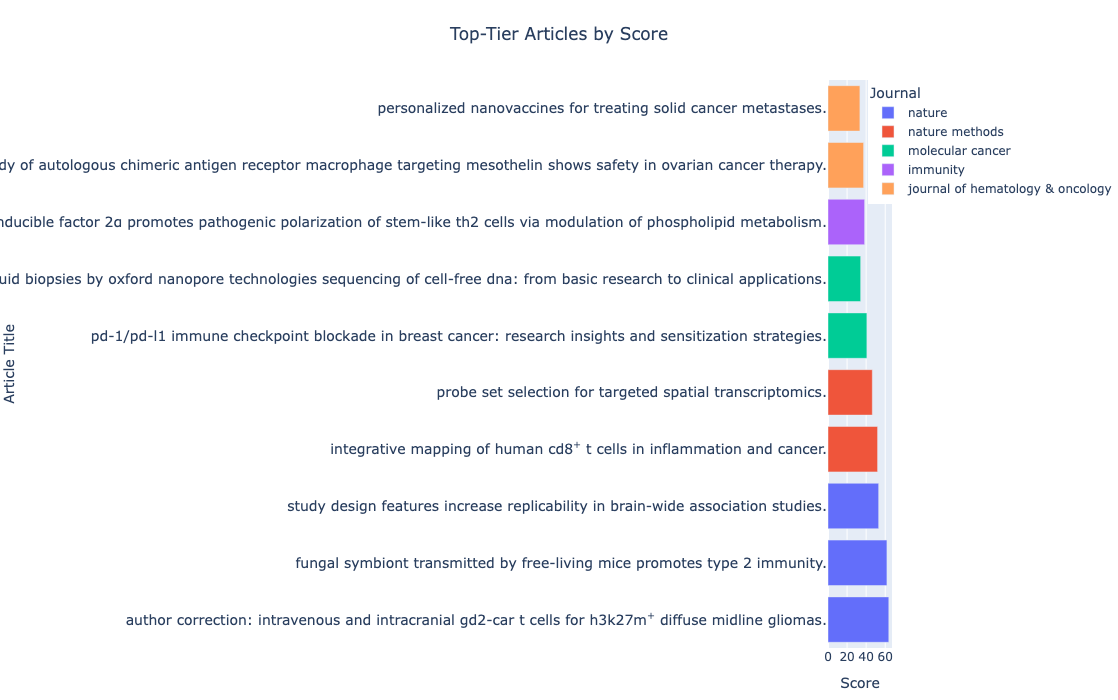

In [31]:
import plotly.express as px

# Example DataFrame of top-tier articles
# Replace this with your actual DataFrame
df = top_tier_df  # already filtered or sorted by Score

fig = px.bar(
    df,
    x='Score',
    y='Title',
    orientation='h',
    color='Journal',
    hover_data=['Study_Type_Extracted', 'Standardized_University'],
    title='Top-Tier Articles by Score',
    # Make the figure bigger right from the start
    width=1300,  
    height=700   
)

# 1. Give extra margin on the left to accommodate long y-axis labels (article titles)
fig.update_layout(
    margin=dict(l=500, r=50, t=80, b=50),  # Increase left margin significantly
    xaxis_title='Score',
    yaxis_title='Article Title',
    title={
        'text': 'Top-Tier Articles by Score',
        'x':0.5,              # Center the title
        'xanchor':'center'
    }
)

# 2. Adjust y-axis text properties
fig.update_yaxes(
    automargin=True,         # Allows Plotly to adjust margins if labels are too long
    tickfont=dict(size=14)   # Slightly smaller font so titles fit better
)

# 3. Optionally adjust the x-axis too if needed
fig.update_xaxes(automargin=True)

fig.show()


In [21]:
df['Tier'] = pd.qcut(df['Score'], q=3, labels=['Low', 'Medium', 'High'])
df.head()

,Unnamed: 0,Title,Abstract,Journal,Language,Year,Month,Authors,Affiliations,Name,...,Universities,Study_Type_Extracted,Standardized_University,Rank,Research_Score,Rank_Median,Research_Score_Category,GMM_Cluster,Score,Tier
231,233,author correction: intravenous and intracrania...,no abstract,nature,eng,2024,Nov,"Monje Michelle, Mahdi Jasia, Majzner Robbie, Y...",department of neurology and neurological scien...,nature,...,department of neurology and neurological scien...,Unknown,stanford university,2,97.8,2.0,High (75-100),2,63.751795,High
44,44,fungal symbiont transmitted by free-living mic...,the gut mycobiota is crucial for intestinal ho...,nature,eng,2024,Nov,"Liao Yun, Gao Iris H, Kusakabe Takato, Lin Woa...",joan and sanford i. weill department of medici...,nature,...,"cornell university, cornell university, cornel...",Unknown,cornell university,20,88.7,20.0,High (75-100),2,61.790934,High
340,342,study design features increase replicability i...,brain-wide association studies (bwas) are a fu...,nature,eng,2024,Nov,"Kang Kaidi, Seidlitz Jakob, Bethlehem Richard ...","department of biostatistics, vanderbilt univer...",nature,...,"vanderbilt university medical center, the chil...",brain-wide association studies,vanderbilt university,92,48.5,92.0,Low (0-50),2,53.128673,High
225,227,integrative mapping of human cd8<sup>+</sup> t...,cd8<sup>+</sup> t cells exhibit remarkable phe...,nature methods,eng,2024,Nov,"Xue Ziwei, Wu Lize, Tian Ruonan, Gao Bing, Zha...",department of rheumatology and immunology of t...,nature methods,...,"zhejiang university, university of edinburgh i...",68 studies,zhejiang university,55,75.3,55.0,High (75-100),2,51.999730,Medium
472,474,probe set selection for targeted spatial trans...,targeted spatial transcriptomic methods captur...,nature methods,eng,2024,Nov,"Kuemmerle Louis B, Luecken Malte D, Firsova Al...","institute of computational biology, helmholtz ...",nature methods,...,"institute of computational biology, institute ...",scrinshot,stockholm university,185,49.6,185.0,Low (0-50),2,46.461917,Medium


In [22]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Step 1: Create the subplot "canvas"
fig = make_subplots(
    rows=1, cols=2,  # 1 row, 2 columns
    subplot_titles=("Journal vs. Score", "Journal vs. Tier")
)


In [19]:
def extract_high_tier_abstracts(df, tier_column, abstract_column, output_file):
    # Filter for "High" tier and exclude rows with "no abstract"
    high_tier_df = df[(df[tier_column] == 'High') & (df[abstract_column].str.lower() != 'no abstract')]
    
    # Sort by score and select top 10
    top_abstracts = high_tier_df.nlargest(10, 'Score')[abstract_column]
    
    # Save abstracts to a .txt file
    with open(output_file, 'w') as file:
        for i, abstract in enumerate(top_abstracts, 1):
            file.write(f"Abstract {i}:\n{abstract}\n\n")
    print(f"Saved top 10 abstracts to {output_file}")


In [20]:
tier_column = 'Tier'
abstract_column = 'Abstract'
output_abstracts_file = 'top_10_abstracts.txt'
extract_high_tier_abstracts(df, tier_column, abstract_column, output_abstracts_file)


Saved top 10 abstracts to top_10_abstracts.txt
